# MAST30034 Applied Data Science Project 2

## Customer Analysis Notebook

In [2]:
from pyspark.sql import SparkSession, functions as F, DataFrame
import matplotlib.pyplot as plt
from turtle import title

In [3]:
spark = (
    SparkSession.builder.appName("Customer_Analysis")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/09/04 17:48:25 WARN Utils: Your hostname, Yis-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 172.16.33.143 instead (on interface en0)
22/09/04 17:48:25 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/09/04 17:48:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
joined_data = spark.read.parquet('../data/curated/joined_data.parquet')

In [5]:
#joined_data.describe()

summary,consumer_id,user_id,merchant_abn,dollar_value,order_id,name,tags,consumer_name,address,state,postcode,gender
count,3494038,3494038,3494038,3494038,3494038,3494038,3494038,3494038,3494038,3494038,3494038,3494038
mean,753374.5329690175,12038.032943545548,5.585243624644211E10,158.60763205130544,null,null,null,null,null,null,4043.94900227187,null
stddev,435461.1406722774,6951.607246286599,2.523671447353531...,467.64218536055904,null,null,null,null,null,null,1780.2537222397223,null
min,30,1,10023283211,9.756658099412162E-8,000000f8-6795-4d2...,A Aliquet Ltd,((Artist supply a...,Aaron Adkins,000 Barnes Missio...,ACT,1001,Female
max,1499867,24081,99990536339,105193.88578925544,fffffb2e-6809-44b...,Vulputate Velit Inc.,"[[watch, clock, a...",Zoe Randall,99994 Krystal Views,WA,9999,Undisclosed


### Aggregate Data

In [12]:
# By State
transaction_by_state = joined_data \
                    .groupBy("state") \
                    .agg(
                        F.mean("dollar_value").alias("mean_amount"),
                        F.sum("dollar_value").alias("total_amount"),
                        F.count("order_id").alias("order_volume")
                    ) \
                    .orderBy("state") \
                    .toPandas()

# By Postcode
transaction_by_postcode = joined_data \
                    .groupBy("postcode") \
                    .agg(
                        F.mean("dollar_value").alias("mean_amount"),
                        F.sum("dollar_value").alias("total_amount"),
                        F.count("order_id").alias("order_volume")
                    ) \
                    .orderBy("postcode") \
                    .toPandas()

In [20]:
# By Merchant
transaction_by_merchant = joined_data \
                    .groupBy("merchant_abn") \
                    .agg(
                        F.mean("dollar_value").alias("mean_amount"),
                        F.sum("dollar_value").alias("total_amount"),
                        F.count("order_id").alias("order_volume")
                    ) \
                    .orderBy("merchant_abn") \
                    .toPandas()

In [22]:
transaction_by_merchant

,merchant_abn,mean_amount,total_amount,order_volume
1330,39150153670,38089.939272,3.808994e+04,1
1348,39580029434,2670.486173,2.670486e+03,1
585,22853038342,14491.665724,1.449167e+04,1
586,22883189698,2374.805238,2.374805e+03,1
1862,51267358936,3771.568249,3.771568e+03,1
...,...,...,...,...
1675,46804135891,30.017340,1.800530e+06,59983
1807,49891706470,28.942933,1.840481e+06,63590
2412,64203420245,28.846971,1.930641e+06,66927
3407,86578477987,35.116332,2.451541e+06,69812


### Transaction By State

<AxesSubplot:title={'center':'Average Amount($)'}, ylabel='state'>

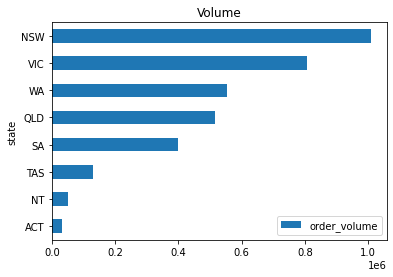

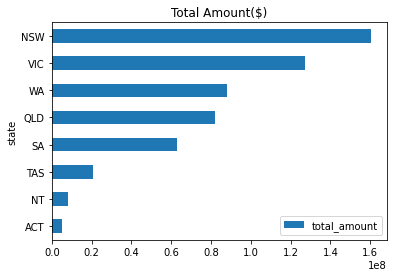

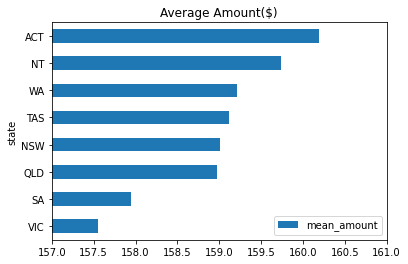

In [17]:
transaction_by_state = transaction_by_state.sort_values(by='order_volume')
transaction_by_state.plot(x='state', y='order_volume', kind="barh", title='Volume')
transaction_by_state = transaction_by_state.sort_values(by='total_amount')
transaction_by_state.plot(x='state', y='total_amount', kind="barh", title='Total Amount($)')
transaction_by_state = transaction_by_state.sort_values(by='mean_amount')
transaction_by_state.plot(x='state', y='mean_amount', kind="barh", xlim=[157,161], title='Average Amount($)')

### Transaction Volume By Postcode (Top 10)

<AxesSubplot:ylabel='postcode'>

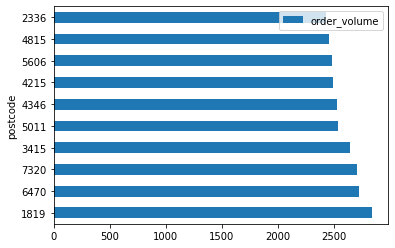

In [29]:
transaction_by_postcode = transaction_by_postcode.sort_values(by='order_volume', ascending=False)
transaction_by_postcode[:10].plot(x='postcode', y='order_volume', kind="barh")

### Transaction Volume By Merchant (Top 10)

<AxesSubplot:ylabel='merchant_abn'>

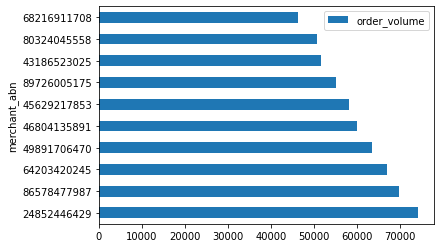

In [30]:
transaction_by_merchant = transaction_by_merchant.sort_values(by='order_volume', ascending=False)
transaction_by_merchant[:10].plot(x='merchant_abn', y='order_volume', kind="barh")

### Geospatial Visualisation (Need ABS SA2 Data)